In [39]:
# Ver las primeras líneas del archivo crudo
with open('beneficiarios.csv', 'r') as f:
    for i, line in enumerate(f):
        if i < 15:  # Mostrar primeras 15 líneas
            print(f"Línea {i}: {line.strip()}")
        else:
            break

Línea 0: ﻿DEPARTAMENTO;MUNICIPIO;GENERO;EDAD;PLATAFORMA_EDUCATIVA
Línea 1: CUNDINAMARCA;ZIPAQUIRA;MASCULINO;31;COURSERA
Línea 2: NARIÑO;PASTO;MASCULINO;40;DATACAMP
Línea 3: VALLE DEL CAUCA;YUMBO;MASCULINO;28;PLATZI
Línea 4: ANTIOQUIA;SABANETA;FEMENINO;35;MICROSOFT AZURE
Línea 5: ANTIOQUIA;SABANETA;MASCULINO;35;PLATZI
Línea 6: ANTIOQUIA;MEDELLIN;MASCULINO;30;MICROSOFT AZURE
Línea 7: ANTIOQUIA;MEDELLIN;MASCULINO;30;MICROSOFT AZURE
Línea 8: ANTIOQUIA;MEDELLIN;MASCULINO;30;MICROSOFT AZURE
Línea 9: ANTIOQUIA;SABANETA;MASCULINO;31;UDACITY
Línea 10: META;VILLAVICENCIO;MASCULINO;24;COURSERA
Línea 11: BOGOTA;BOGOTA, D.C.;MASCULINO;33;MICROSOFT AZURE
Línea 12: BOGOTA;BOGOTA, D.C.;MASCULINO;33;MICROSOFT AZURE
Línea 13: BOGOTA;BOGOTA, D.C.;MASCULINO;33;MICROSOFT AZURE
Línea 14: BOGOTA;BOGOTA, D.C.;MASCULINO;33;MICROSOFT AZURE


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización

plt.rcParams['figure.figsize'] = (12, 6)


# 1. Cargar los datos con el delimitador correcto y manejo de encoding
df = pd.read_csv('beneficiarios.csv', delimiter=';', encoding='utf-8-sig')

# Verificar carga correcta
print("Primeras filas del dataframe:")
print(df.head())

Primeras filas del dataframe:
      DEPARTAMENTO  MUNICIPIO     GENERO  EDAD PLATAFORMA_EDUCATIVA
0     CUNDINAMARCA  ZIPAQUIRA  MASCULINO    31             COURSERA
1           NARIÑO      PASTO  MASCULINO    40             DATACAMP
2  VALLE DEL CAUCA      YUMBO  MASCULINO    28               PLATZI
3        ANTIOQUIA   SABANETA   FEMENINO    35      MICROSOFT AZURE
4        ANTIOQUIA   SABANETA  MASCULINO    35               PLATZI


In [41]:
# 2. Limpieza inicial (opcional, para quitar espacios en nombres de columnas)

df.columns = df.columns.str.strip()


# df.columns: Obtiene los nombres de las columnas del DataFrame.

# .str.strip(): Aplica el método strip() a cada nombre de columna, que elimina:

# Espacios al inicio (" DEPARTAMENTO" → "DEPARTAMENTO")

# Espacios al final ("DEPARTAMENTO " → "DEPARTAMENTO")

# Tabulaciones (\t), saltos de línea (\n), u otros caracteres "invisibles".




/tmp/ipython-input-42-1282972241.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=departamentos, y=cantidades, palette=colores,


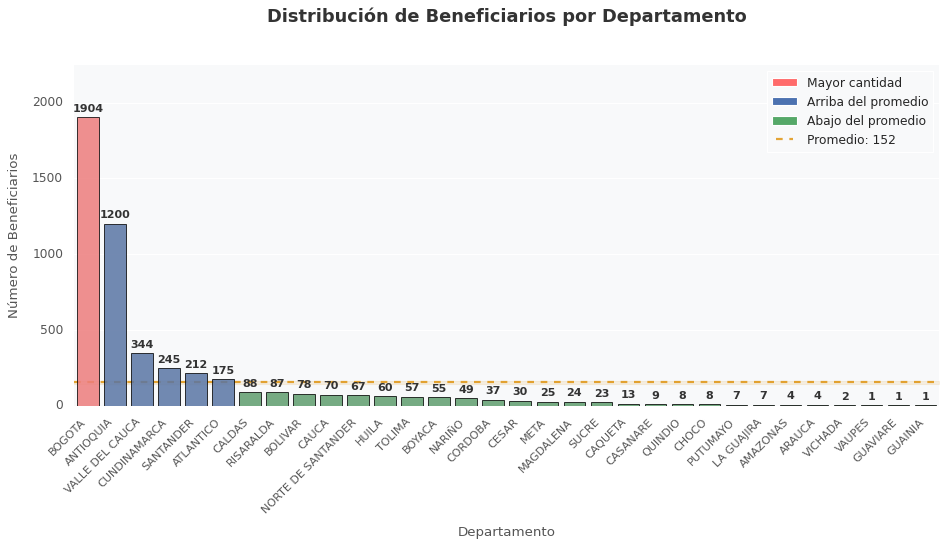

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
plt.style.use('classic')  # Fondo con grid sutil
sns.set(rc={'axes.facecolor':'#f8f9fa', 'figure.facecolor':'white'})  # Colores de fondo

# Datos
departamentos = df['DEPARTAMENTO'].value_counts().index.tolist()
cantidades = df['DEPARTAMENTO'].value_counts().values.tolist()
promedio = np.mean(cantidades)
max_cantidad = max(cantidades)

# Definir colores por categoría
color_max = '#FF6B6B'  # Color para el máximo
color_arriba_prom = '#4C72B0'  # Color para arriba del promedio
color_abajo_prom = '#55A868'  # Color para abajo del promedio

# Crear lista de colores según categorías
colores = []
for cantidad in cantidades:
    if cantidad == max_cantidad:
        colores.append(color_max)
    elif cantidad > promedio:
        colores.append(color_arriba_prom)
    else:
        colores.append(color_abajo_prom)

# Crear figura
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=departamentos, y=cantidades, palette=colores,
                 edgecolor='black', linewidth=0.8, alpha=0.85)

# --- MEJORAS VISUALES ---
# Título y etiquetas
plt.title('Distribución de Beneficiarios por Departamento\n',
          fontsize=16, fontweight='bold', pad=20, color='#333333')
plt.xlabel('Departamento', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Número de Beneficiarios', fontsize=12, labelpad=10, color='#555555')

# Rotación de etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10, color='#555555')
plt.yticks(color='#555555')

# Añadir valores en las barras
for i, v in enumerate(cantidades):
    ax.text(i, v + (0.02*max_cantidad), str(v),
            ha='center',
            fontsize=10,
            fontweight='bold',
            color='#333333')

# Línea horizontal de referencia mejorada
plt.axhline(y=promedio,
            color='#DE8F05',  # Rojo moderno
            linestyle='--',
            linewidth=2,
            alpha=0.8,  # Ligera transparencia
            label=f'Promedio: {int(promedio):,}',  # Formato con separadores de miles
            zorder=0)  # Para que quede detrás de las barras

# Opcional: sombreado del área alrededor del promedio
plt.fill_between(x=ax.get_xlim(),  # Rango completo del eje X
                y1=promedio*0.95,   # 5% debajo del promedio
                y2=promedio*1.05,   # 5% arriba del promedio
                color='#DE8F05',
                alpha=0.1,          # Muy transparente
                zorder=-1)          # Capa inferior

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_max, label='Mayor cantidad'),
    Patch(facecolor=color_arriba_prom, label='Arriba del promedio'),
    Patch(facecolor=color_abajo_prom, label='Abajo del promedio'),
    plt.Line2D([0], [0],
               color='#DE8F05',  # Mismo color
               linestyle='--',   # Mismo estilo de línea
               linewidth=2,      # Mismo grosor
               alpha=0.8,        # Misma transparencia
               label=f'Promedio: {int(promedio):,}')  # Mismo formato
]
plt.legend(handles=legend_elements, frameon=True, framealpha=1)

# Ajustar límites del eje Y
plt.ylim(0, max(cantidades) * 1.18)  # Más espacio para los textos

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

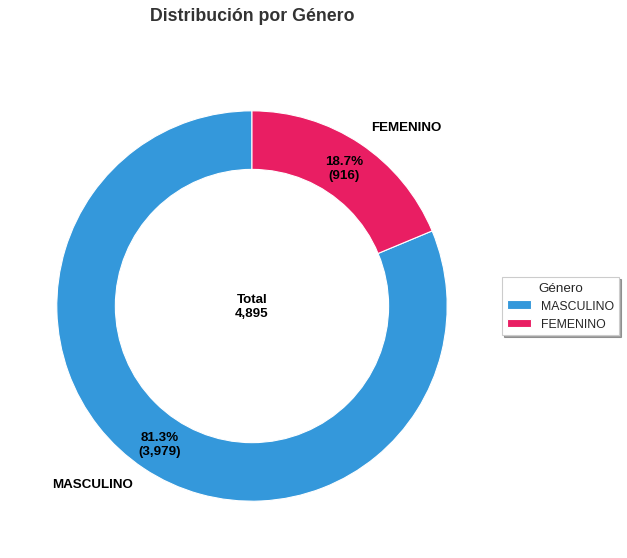

In [43]:
# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')  # Fondo con grid
sns.set_palette("pastel")  # Paleta suave

# Datos
gender_counts = df['GENERO'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()

# Crear figura con tamaño adecuado
plt.figure(figsize=(8, 8), facecolor='white')

# Función para formato de porcentaje corregida
def format_autopct(pct, sizes):
    total = sum(sizes)
    val = int(round(pct*total/100))
    return f'{pct:.1f}%\n({val:,})'  # Formato con separadores de miles

# Gráfico de dona profesional
plt.pie(sizes,
        labels=labels,
        autopct=lambda p: format_autopct(p, sizes),
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'color': 'black', 'fontweight': 'bold'},
        colors=['#3498db', '#e91e63'],  # Azul y rosado profesional
        pctdistance=0.85)

# Añadir círculo central para convertir en dona
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))

# Título y anotaciones
plt.title('Distribución por Género\n',
          fontsize=16, fontweight='bold', pad=20, color='#333333')

# Leyenda profesional
plt.legend(labels,
           title="Género",
           loc="center left",
           bbox_to_anchor=(1, 0.5),
           frameon=True,
           shadow=True)

# Añadir anotación con total
total = sum(sizes)
plt.text(0, 0, f'Total\n{total:,}',
         ha='center',
         va='center',
         fontsize=12,
         fontweight='bold',
         color='black')

# Eliminar eje Y
plt.ylabel('')

# Ajustar layout
plt.tight_layout()
plt.show()

/tmp/ipython-input-44-1876971824.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


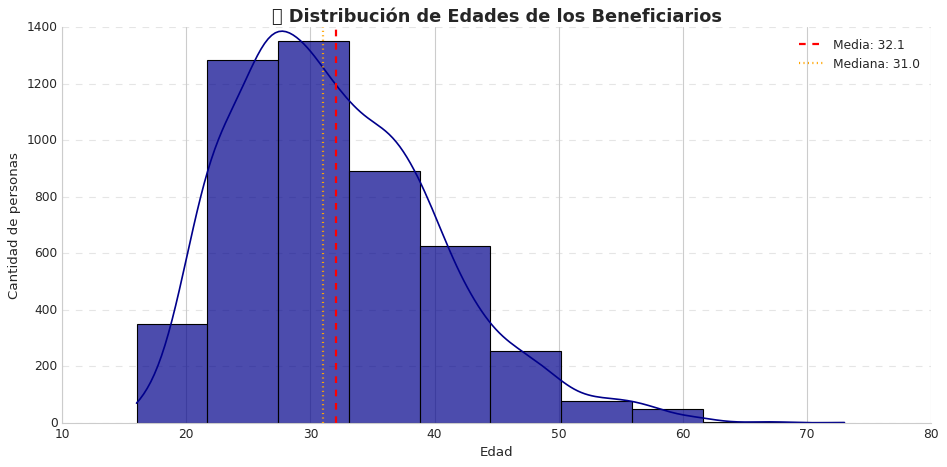

In [44]:
import numpy as np

sns.set_style('whitegrid')  # Fondo con líneas suaves

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='EDAD',
    bins=10,
    kde=True,
    color='darkblue',  # verde profesional
    edgecolor='black',
    alpha=0.7
)

# Media y mediana
media = df['EDAD'].mean()
mediana = df['EDAD'].median()
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
plt.axvline(mediana, color='orange', linestyle=':', linewidth=2, label=f'Mediana: {mediana:.1f}')
plt.legend()

# Etiquetas
plt.title('📊 Distribución de Edades de los Beneficiarios', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)

# Guías y bordes
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipython-input-45-2341753230.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


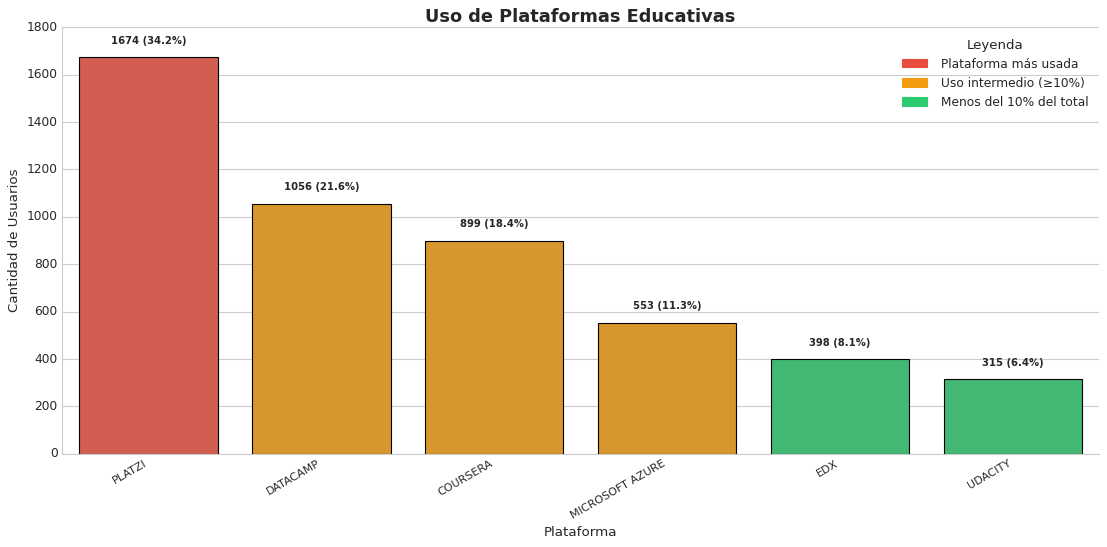

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Limpiar y contar plataformas
df['PLATAFORMA_EDUCATIVA'] = df['PLATAFORMA_EDUCATIVA'].str.strip().str.upper()
conteo = df['PLATAFORMA_EDUCATIVA'].value_counts()
total = conteo.sum()

# Crear DataFrame
df_conteo = conteo.reset_index()
df_conteo.columns = ['Plataforma', 'Cantidad']
df_conteo['Porcentaje'] = (df_conteo['Cantidad'] / total * 100).round(1)

# Asignar colores tipo semáforo según % y uso
colores = []
max_val = df_conteo['Cantidad'].max()

for _, row in df_conteo.iterrows():
    if row['Cantidad'] == max_val:
        colores.append('#e74c3c')  # 🔴 rojo
    elif row['Porcentaje'] < 10:
        colores.append('#2ecc71')  # 🟢 verde
    else:
        colores.append('#f39c12')  # 🟠 naranja

# Crear figura
plt.figure(figsize=(14, 7))
bars = sns.barplot(
    data=df_conteo,
    x='Plataforma',
    y='Cantidad',
    palette=colores,
    edgecolor='black'
)

# Etiquetas sobre las barras
for i, row in df_conteo.iterrows():
    plt.text(
        i,
        row['Cantidad'] + total * 0.01,
        f"{row['Cantidad']} ({row['Porcentaje']}%)",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Leyenda manual
import matplotlib.patches as mpatches
leyenda = [
    mpatches.Patch(color='#e74c3c', label=' Plataforma más usada'),
    mpatches.Patch(color='#f39c12', label=' Uso intermedio (≥10%)'),
    mpatches.Patch(color='#2ecc71', label=' Menos del 10% del total')
]
plt.legend(handles=leyenda, title='Leyenda', loc='upper right')

# Estética
plt.title('Uso de Plataformas Educativas', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


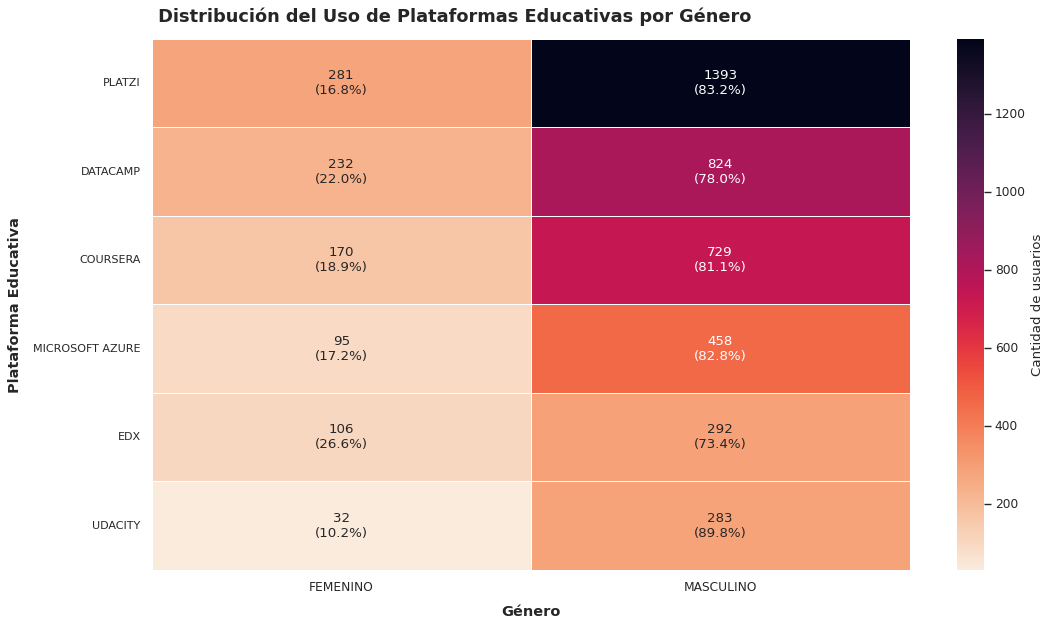

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar plataformas por uso total (de mayor a menor)
orden = cross_gen_plat.sum(axis=1).sort_values(ascending=False).index
cross_gen_plat_sorted = cross_gen_plat.loc[orden]

# Calcular porcentajes por fila
cross_pct = cross_gen_plat_sorted.div(cross_gen_plat_sorted.sum(axis=1), axis=0) * 100

# Etiquetas combinadas: cantidad + porcentaje
labels = cross_gen_plat_sorted.astype(str) + "\n(" + cross_pct.round(1).astype(str) + "%)"

# Configuración general de estilo
sns.set_style("white")
sns.set(font_scale=1.0)
plt.rcParams['font.family'] = 'sans-serif'

# Crear figura
plt.figure(figsize=(14, 8))

# Crear heatmap
ax = sns.heatmap(
    cross_gen_plat_sorted,
    annot=labels,
    fmt='',
    cmap='rocket_r',  # Estética más marcada
    linewidths=0.6,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de usuarios'}
)

# Títulos y etiquetas
plt.title(' Distribución del Uso de Plataformas Educativas por Género',
          fontsize=16, fontweight='bold', loc='left', pad=15)
plt.xlabel('Género', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Plataforma Educativa', fontsize=13, fontweight='bold', labelpad=10)

# Ajustes de ticks
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=10)

# Layout limpio
plt.tight_layout()
plt.show()


In [47]:
# Crear rangos etarios
bins = [0, 12, 18, 26, 40, 60, 100]
labels = ['Niñez (0-12)', 'Adolescencia (13-18)', 'Juventud (19-26)', 'Adultez joven (27-40)',
          'Adultez media (41-60)', 'Adulto mayor (60+)']

df['GRUPO_ETARIO'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True)

/tmp/ipython-input-48-3707138516.py:45: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


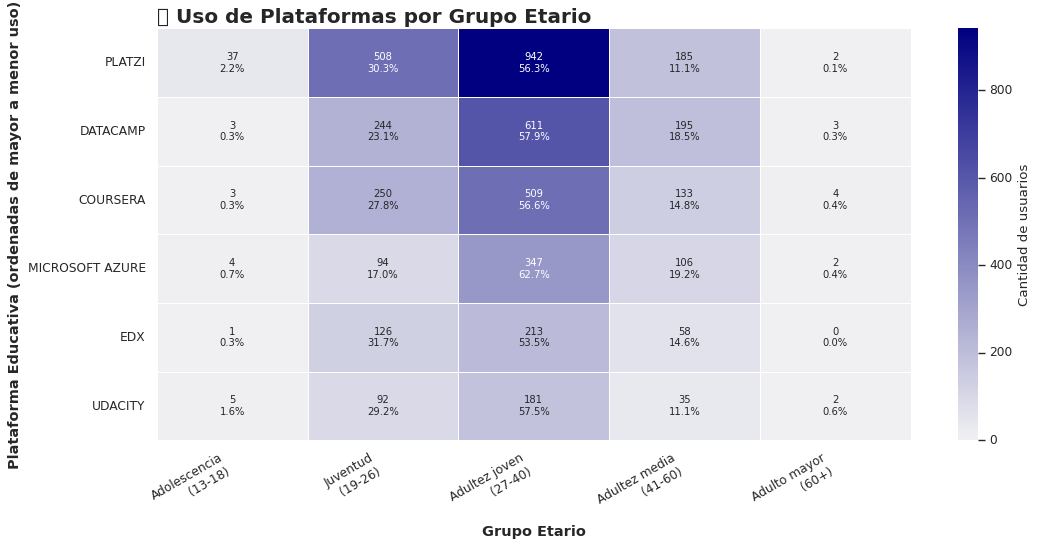

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crear grupos etarios
bins = [0, 12, 18, 26, 40, 60, 100]
labels = ['Niñez\n(0-12)', 'Adolescencia\n(13-18)', 'Juventud\n(19-26)',
          'Adultez joven\n(27-40)', 'Adultez media\n(41-60)', 'Adulto mayor\n(60+)']
df['GRUPO_ETARIO'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True)

# 2. Tabla cruzada
cross = pd.crosstab(df['PLATAFORMA_EDUCATIVA'], df['GRUPO_ETARIO'])

# 3. Ordenar plataformas de mayor a menor uso total
platform_order = cross.sum(axis=1).sort_values(ascending=False).index
cross = cross.loc[platform_order]

# 4. Calcular porcentajes por fila
cross_pct = cross.div(cross.sum(axis=1), axis=0) * 100

# 5. Crear anotaciones con valor + porcentaje
annot = cross.astype(str) + '\n' + cross_pct.round(1).astype(str) + '%'

# 6. Visualización
plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')
cmap = sns.light_palette("navy", as_cmap=True)

sns.heatmap(
    cross,
    annot=annot,
    fmt='',
    cmap=cmap,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de usuarios'},
    annot_kws={"size": 9}
)

plt.title('🧠 Uso de Plataformas por Grupo Etario', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Grupo Etario', fontsize=13, fontweight='bold')
plt.ylabel('Plataforma Educativa (ordenadas de mayor a menor uso)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
